In [2]:
%matplotlib inline
import mpld3
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import pylab as pl

import mplleaflet

import geopy
import geopy.distance

import re

from scipy import stats
from geopy.distance import vincenty
from sklearn.cluster import KMeans

In [3]:
stops = pd.read_csv('stops.csv')
traffic = pd.read_csv('traffic.csv')
culture = pd.read_csv('culture_locations.csv')
with open("checkins_final.txt") as cFile:
        checkins_raw = cFile.read().splitlines()
    
checkins_array = np.array([re.sub('[\s]', '', string[1:-1]).split(',') 
                            for string in checkins_raw]).astype(np.float)
#print(checkins[:5])

checkins = pd.DataFrame(checkins_array, columns=['Latitude', 'Longitude', 'Count'])

print (checkins.head)

<bound method NDFrame.head of        Latitude  Longitude   Count
0     43.854249 -79.626181     1.0
1     43.850556 -79.621290    21.0
2     43.850227 -79.562322    18.0
3     43.854468 -79.566021     5.0
4     43.851255 -79.563502     6.0
5     43.851682 -79.562838    19.0
6     43.851365 -79.570327     1.0
7     43.854228 -79.553059   179.0
8     43.853288 -79.557575   129.0
9     43.849604 -79.554546     7.0
10    43.850180 -79.558344     4.0
11    43.852567 -79.556050     0.0
12    43.854209 -79.552723     1.0
13    43.854538 -79.552856   206.0
14    43.849353 -79.558109     1.0
15    43.855435 -79.552620    90.0
16    43.854261 -79.552834   224.0
17    43.851335 -79.535006     3.0
18    43.855049 -79.543443    23.0
19    43.852683 -79.521027   421.0
20    43.852020 -79.522127    12.0
21    43.849464 -79.521940     1.0
22    43.850127 -79.519742     0.0
23    43.852356 -79.521034     8.0
24    43.848734 -79.524481    12.0
25    43.852309 -79.522375    83.0
26    43.847532 -79.50802

In [4]:
#centering longitude and latitutde
mean_lat_culture = culture['LATITUDE'].mean()
mean_lon_culture = culture['LONGITUDE'].mean()

#mean_lon_stops = stops['stop_lon'].mean()
#mean_lat_stops = stops['stop_lat'].mean()

#mean_lat_traffic = traffic['Latitude'].mean()
#mean_lon_traffic = traffic['Longitude'].mean()

#Uniform shift
"""culture['LATITUDE'] -= mean_lat_culture
culture['LONGITUDE'] -= mean_lon_culture

stops['stop_lat'] -= mean_lat_culture
stops['stop_lon'] -= mean_lon_culture

traffic['Latitude'] -= mean_lat_culture
traffic['Longitude'] -= mean_lon_culture
"""

#print(mean_lat)
#print(mean_long)
#print(culture['LATITUDE'][:5])

/home/dluo/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/dluo/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


"culture['LATITUDE'] -= mean_lat_culture\nculture['LONGITUDE'] -= mean_lon_culture\n\nstops['stop_lat'] -= mean_lat_culture\nstops['stop_lon'] -= mean_lon_culture\n\ntraffic['Latitude'] -= mean_lat_culture\ntraffic['Longitude'] -= mean_lon_culture\n"

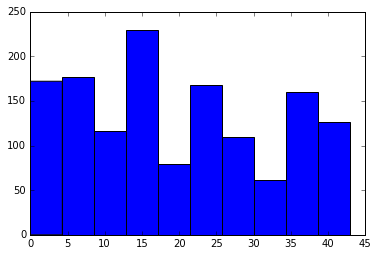

In [5]:
#clusters == 44

num_clusters = 44
kmeans = KMeans(n_clusters=num_clusters)

cluster = kmeans.fit_predict(culture[['LONGITUDE', 'LATITUDE']])

plt.figure()
plt.hist(cluster)
plt.show()

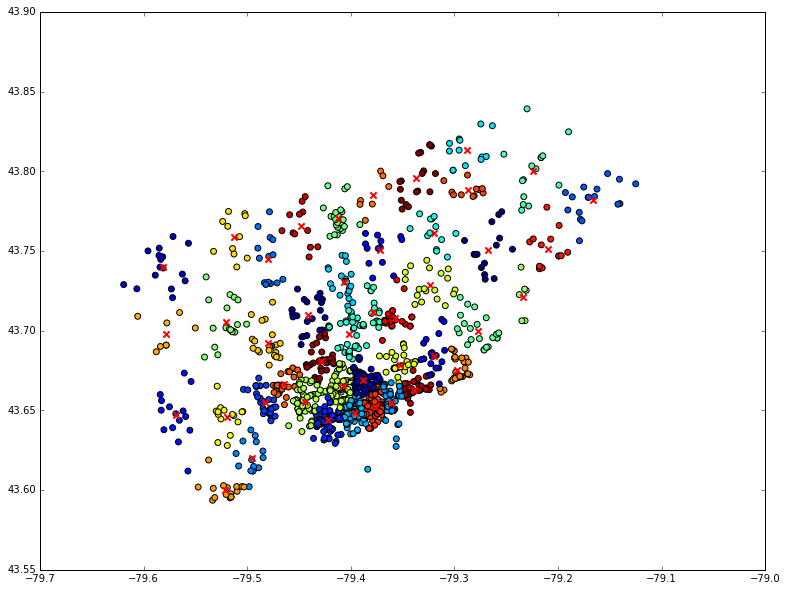

In [6]:
fig, ax = plt.subplots(figsize=(13, 10))
#ax[1].figure()
plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, s=35)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=39, linewidths=2,
                color='r', zorder=10)
#mplleaflet.display()#fig=ax.figure)

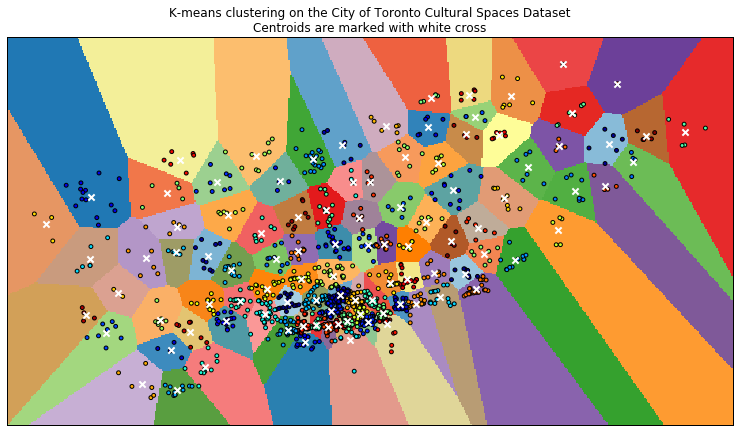

In [7]:
num_clusters = 100
h = .001

#x = longitude, y = latitude
x = culture['LONGITUDE']
y = culture['LATITUDE']

kmeans = KMeans(n_clusters=num_clusters)
#kmeans.fit(culture[['LONGITUDE', 'LATITUDE']])
cluster = kmeans.fit_predict(culture[['LONGITUDE', 'LATITUDE']])

#mm = margin for size of plot
mm = 0.02

x_min, x_max = (x.min() - mm, x.max() + mm)
y_min, y_max = (y.min() - mm, y.max() + mm)
xyratio = (y_max - y_min)/(x_max - x_min)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z_old = Z
Z = Z.reshape(xx.shape)
plt.figure(figsize=(13, 13 * xyratio))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

#plt.plot(x, y, 'k.', ms=10)
plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, s=15)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=39, linewidths=2,
            color='w', zorder=10)
plt.title('K-means clustering on the City of Toronto Cultural Spaces Dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#plt.figure(figsize=(13, 13))
#plt.hist((Z_old, cluster), normed=True, histtype='bar', bins=num_clusters, label=('Z_old', 'cluster'))
#plt.legend()


#plt.hist(cluster, normed=True)
#plt.show()

0.5


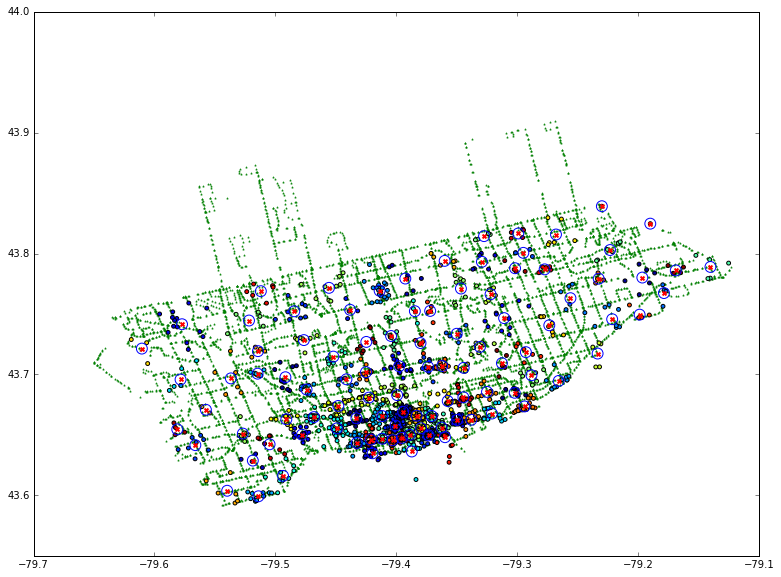

In [8]:
#calculating 500m in coordinates, assuming spherical earth, radius 6371 km
d = .5
print (d)



#Going now to transit stops
#plt.figure(figsize=(13, 13))
width = 13
fig, ax = plt.subplots(figsize=(width, (.45)/(.6)*width))
centroids = kmeans.cluster_centers_

#Transit stops are denoted by triangles
plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=1)
plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, s=15)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=15, linewidths=2,
            color='r', zorder=10)
plt.xlim(-79.7, -79.1)
plt.ylim(43.55, 44.)

circle_rad = d/6371 * (360./(2 * np.pi))
for i in range(len(centroids)):
    circle = plt.Circle(centroids[i], circle_rad, color='blue')
    circle.set_facecolor('none')
    ax.add_artist(circle)
plt.show()


0.5


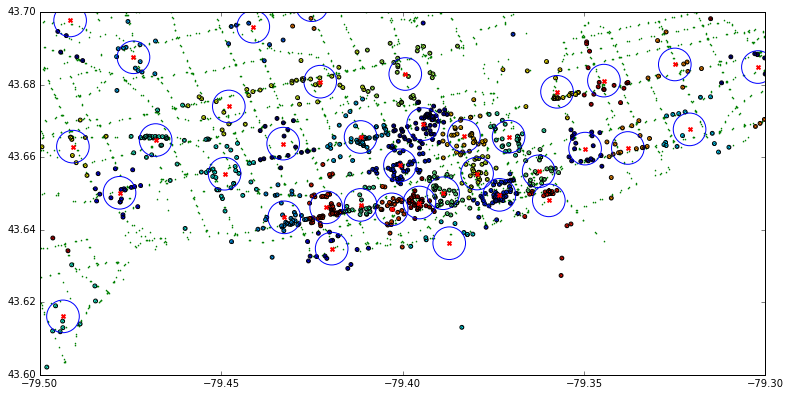

In [9]:
#calculating 500m in coordinates, assuming spherical earth, radius 6371 km
#%matplotlib qt
xlims = (-79.5, -79.3)
ylims = (43.6, 43.7)
limratio = (ylims[1] - ylims[0])/(xlims[1] - xlims[0])

d =.5 #in km
print (d)

#Going now to transit stops
#plt.figure(figsize=(13, 13))
width = 13
fig, ax = plt.subplots(figsize=(width, (limratio)*width))
centroids = kmeans.cluster_centers_

#Transit stops are denoted by triangles
plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=0.5)
plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, facecolors='none', s=15)
plt.plot(culture['LONGITUDE'], culture[ 'LATITUDE'], 'o', mfc='none', ms=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=15, linewidths=2,
            color='r', zorder=10)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])

circle_rad = d/6371 * (360./(2 * np.pi))
for i in range(len(centroids)):
    circle = plt.Circle(centroids[i], circle_rad, color='blue')
    circle.set_facecolor('none')
    ax.add_artist(circle)
plt.show()

In [10]:
cluster_sizes = np.bincount(cluster)

print(num_clusters)
print(cluster_sizes)

100
[17  9  6  9 60  7 20  4  6 14 16 21 19 11  4 47 49  8 13  8  4  6  9  4  6
  8 21 11 36 11 13 45  8 15  6 10 33  4 11 29  8 26  1 25  5 15  7 43 24  5
  5  7  8  7  9 27  7  7  6  5 28 23 15  6 12 23  6  3  8  2 34  6  6  4  6
 18  9 11 20  4 14  1  5 30  6  5  6 55 29  6  6 17  5  8 49  4  4  8  5  5]


In [11]:
d= 0.5
print('d = ', d)
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def overlapPenalty(lon_array, lat_array, dist_threshhold):
    #broadcast nump arrays
    #print((lon_array - lon_array[:, np.newaxis]))
    #dist_array = np.sqrt((lon_array - lon_array[:, np.newaxis]) ** 2 + (lat_array - lat_array[:, np.newaxis]) ** 2)
    dist_array = haversine_np(lon_array, lat_array, lon_array[:, np.newaxis], lat_array[:, np.newaxis])
    #print (dist_array)
    #print((dist_threshhold - dist_array) * ((dist_threshhold - dist_array) > 0))
    #print(dist_threshhold - dist_array)
    #print (np.tril(dist_threshhold - dist_array, k=-1))
    #print(dist_array)
    dist_lt = np.tril(dist_threshhold - dist_array, k=-1)#lower triangular matrix
    #print (dist_lt)
    return np.sum(dist_lt * (dist_lt > 0))



#print (overlapPenalty(np.array([0, 0.5, 1.]), np.array([0, 0, 0]), 1))
#print (overlapPenalty(centroids[:, 0], centroids[:, 1], 2*d))
pass

d =  0.5


In [12]:
k_bins = list(range(5, 400, 5))
kmeans_array = [None] * len(k_bins)
cluster_array = [None] * len(k_bins)
k_scores = np.empty(len(k_bins))
#x = culture['LONGITUDE']
#y = culture['LATITUDE']

for i, k in enumerate(k_bins):
    kmeans_array[i] = KMeans(n_clusters=k)
    cluster_array[i] = kmeans_array[i].fit_predict(culture[['LONGITUDE', 'LATITUDE']])
    centroids = kmeans_array[i].cluster_centers_
    k_scores[i] = overlapPenalty(centroids[:, 0], centroids[:, 1], 2*d)
    if (i + 1) % 10 == 0:
        print('Percentage Done = ', str(100 * i/len(k_bins))[:4])
#print(k_scores)


Percentage Done =  11.3
Percentage Done =  24.0
Percentage Done =  36.7
Percentage Done =  49.3
Percentage Done =  62.0
Percentage Done =  74.6
Percentage Done =  87.3


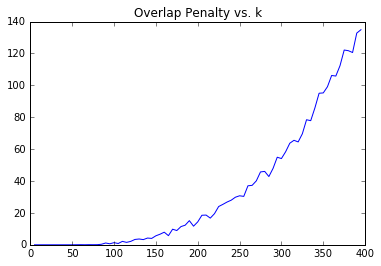

In [41]:
plt.plot(k_bins, k_scores)
plt.title('Overlap Penalty vs. k')

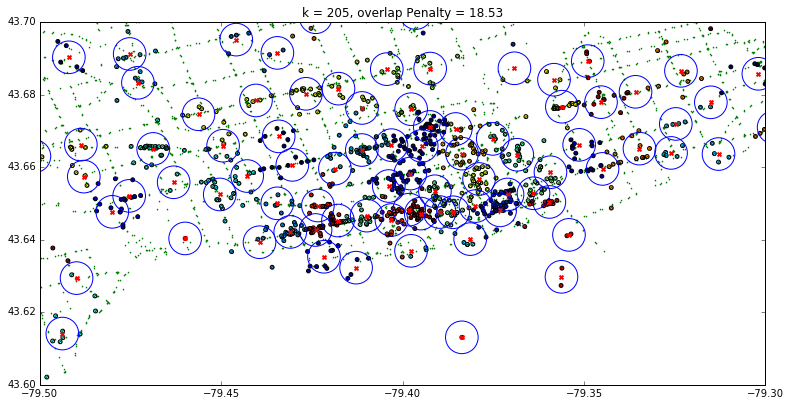

In [14]:
#%matplotlib qt
xlims = (-79.5, -79.3)
ylims = (43.6, 43.7)
limratio = (ylims[1] - ylims[0])/(xlims[1] - xlims[0])

#Going now to transit stops
#plt.figure(figsize=(13, 13))
index = 40
width = 13
fig, ax = plt.subplots(figsize=(width, (limratio)*width))
centroids = kmeans_array[index].cluster_centers_

#Transit stops are denoted by triangles
plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=0.5)
plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, facecolors='none', s=15)
plt.plot(culture['LONGITUDE'], culture[ 'LATITUDE'], 'o', mfc='none', ms=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=15, linewidths=2,
            color='r', zorder=10)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])
plt.title('k = '+str(k_bins[index]) + ', overlap Penalty = '+str(k_scores[index])[:5])


dist = geopy.distance.VincentyDistance(kilometers = 0.5)

circle_rad = d/6371 * (360./(2 * np.pi))
for i in range(len(centroids)):
    circle = plt.Circle(centroids[i], circle_rad, color='blue')
   
    #start = geopy.Point(centroids[i, 1], centroids[i, 0])
    #dest =  dist.destination(point=start, bearing=np.random.uniform(0.0, 360))
    #print(centroids[i])
    #print(dest)
    
    
    #plt.plot(dest.longitude, dest.latitude, 'x', ms=10, lw=5, color='black', zorder=10)
    circle.set_facecolor('none')
    ax.add_artist(circle)

plt.show()

In [15]:
def transitScore(bb_coordinates, threshhold): 
    """
    Return a transit score evaluting how many transit stops are nearby
    """
    bb_lon, bb_lat = bb_coordinates
    
    #bb means billboard, bb_lon is single point
    #mean_lon_stops = stops['stop_lon'].mean()
    #mean_lat_stops = stops['stop_lat'].mean()
    # nearby_stops = np.sqrt((stops['stop_lon'] - bb_lon) ** 2 + (stops['stop_lat'] - bb_lat) ** 2) < threshhold
    nearby_stops = (haversine_np(stops['stop_lon'], stops['stop_lat'], bb_lon, bb_lat) < threshhold)
    #print(nearby_stops)
    return np.sum(nearby_stops)


In [16]:
#K SELECTION FINISHED

d=0.5

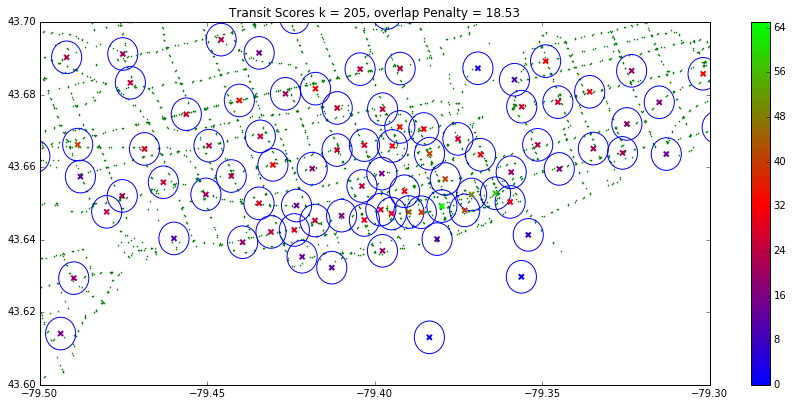

In [17]:
index = 40
width = 13
#Calculatin transit scores

centroids = kmeans_array[index].cluster_centers_
cluster = cluster_array[index]

transit_scores = np.zeros(len(centroids), dtype=int)
for i in range(len(centroids)):
    transit_scores[i] = transitScore(centroids[i], d)    

cm = plt.cm.get_cmap('brg')

k_bins = list(range(5, 400, 5))
#calculating 500m in coordinates, assuming spherical earth, radius 6371 km
#%matplotlib qt
xlims = (-79.5, -79.3)
ylims = (43.6, 43.7)
limratio = (ylims[1] - ylims[0])/(xlims[1] - xlims[0])

#PLOTTING =======================================

fig, ax = plt.subplots(figsize=(width + 2, (limratio)*width))
#fig, ax = plt.subplots(figsize=(12, 6))

#Transit stops are denoted by triangles
plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=0.5)
#plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, facecolors='none', s=5)
#plt.plot(culture['LONGITUDE'], culture[ 'LATITUDE'], 'o', mfc='none', ms=2)

sc = plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=25, linewidths=2,
            c=transit_scores, zorder=10, cmap=cm)

circle_rad = d/6371 * (360 / (2 * np.pi))
for i in range(len(centroids)):
    circle = plt.Circle(centroids[i], circle_rad, color='blue')
    circle.set_facecolor('none')
    ax.add_artist(circle)
    
    
plt.colorbar(sc)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])
plt.title('Transit Scores k = '+str(k_bins[index]) + ', overlap Penalty = '+str(k_scores[index])[:5])# + ', transit Score = ' + str(np.sum(transit_score)))

3707.0
d =  0.5


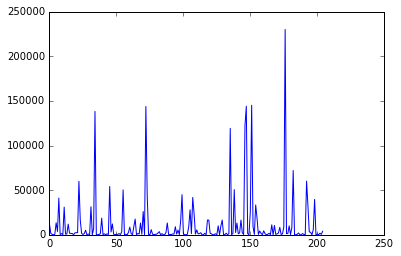

In [18]:
num_centres = np.bincount(cluster)

def checkinScore(coords, threshhold):
    dist_array = haversine_np(checkins['Longitude'], checkins['Latitude'], coords[0], coords[1])
    ind = (dist_array < threshhold)
    return np.sum(checkins['Count'][ind])

print(checkinScore(centroids[6], .5))

checkin_scores = np.zeros(len(centroids))

print ('d = ', d)
for i, coords in enumerate(centroids):
    checkin_scores[i] = checkinScore(coords, d)
    
#print(checkin_scores)

plt.plot(np.arange(0, len(checkin_scores), 1), checkin_scores)
    

In [33]:
cm = plt.cm.get_cmap('brg')

k_bins = list(range(5, 400, 5))
#calculating 500m in coordinates, assuming spherical earth, radius 6371 km
xlims = (-79.5, -79.3)
ylims = (43.6, 43.7)
limratio = (ylims[1] - ylims[0])/(xlims[1] - xlims[0])

#PLOTTING =======================================

fig, ax = plt.subplots(figsize=(width + 2, (limratio)*width))
#fig, ax = plt.subplots(figsize=(12, 6))

#Transit stops are denoted by triangles
#plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=0.5)
#plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, facecolors='none', s=5)
#plt.plot(culture['LONGITUDE'], culture[ 'LATITUDE'], 'o', mfc='none', ms=2)

sc = plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, linewidths=3,
            c=checkin_scores, zorder=10, cmap=cm)

circle_rad = d/6371 * (360 / (2 * np.pi))
for i in range(len(centroids)):
    circle = plt.Circle(centroids[i], circle_rad, color='blue')
    circle.set_facecolor('none')
    ax.add_artist(circle)
    
    
plt.colorbar(sc)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])
plt.title('Checkin Score, k = '+str(k_bins[index]) + ', overlap Penalty = '+str(k_scores[index])[:5])# + ', transit Score = ' + str(np.sum(transit_score)))

mplleaflet.show()

In [40]:
z_checkin = stats.zscore(checkin_scores)
z_centres = stats.zscore(num_centres)
z_transit = stats.zscore(transit_scores)

print(len(z_checkin))
print(len(z_centres))
print(len(z_transit))
#Since this is highly unsupervised problem, weights must be adjusted manually
#arbitrary bias
bias = 10
weights ={'checkin' : 1.,
                     'centres': 2.,
                     'transit': 1.,
                     }

scores = bias + weights['checkin'] * z_checkin + weights['centres'] * z_centres + weights['transit'] * z_transit

print(scores[:5])

205
205
205
[ 11.13523576  10.54152521   9.67234521   7.96405155   7.73457926]


In [34]:
cm = plt.cm.get_cmap('brg')

k_bins = list(range(5, 400, 5))
#calculating 500m in coordinates, assuming spherical earth, radius 6371 km
xlims = (-79.5, -79.3)
ylims = (43.6, 43.7)
limratio = (ylims[1] - ylims[0])/(xlims[1] - xlims[0])

#PLOTTING =======================================

fig, ax = plt.subplots(figsize=(width + 2, (limratio)*width))
#fig, ax = plt.subplots(figsize=(12, 6))

#Transit stops are denoted by triangles
#plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=0.5)
#plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, facecolors='none', s=5)
#plt.plot(culture['LONGITUDE'], culture[ 'LATITUDE'], 'o', mfc='none', ms=2)

sc = plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, linewidths=3,
            c=scores, zorder=10, cmap=cm)

circle_rad = d/6371 * (360 / (2 * np.pi))
for i in range(len(centroids)):
    circle = plt.Circle(centroids[i], circle_rad, color='blue')
    circle.set_facecolor('none')
    ax.add_artist(circle)
    
    
plt.colorbar(sc)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])
plt.title('Final Score, k = '+str(k_bins[index]) + ', overlap Penalty = '+str(k_scores[index])[:5])

mplleaflet.show()

In [38]:
#Top events
args = np.argsort(scores)[::-1]
print(centroids[args[:5]])

[[-79.39500454  43.64720786]
 [-79.38607019  43.64756764]
 [-79.37892886  43.65674223]
 [-79.37993811  43.64927065]
 [-79.38981668  43.64762494]]


In [35]:
cm = plt.cm.get_cmap('brg')

k_bins = list(range(5, 400, 5))
#calculating 500m in coordinates, assuming spherical earth, radius 6371 km
xlims = (-79.5, -79.3)
ylims = (43.6, 43.7)
limratio = (ylims[1] - ylims[0])/(xlims[1] - xlims[0])

#PLOTTING =======================================

fig, ax = plt.subplots(figsize=(width + 2, (limratio)*width))
#fig, ax = plt.subplots(figsize=(12, 6))

#Transit stops are denoted by triangles
#plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=0.5)
#plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, facecolors='none', s=5)
#plt.plot(culture['LONGITUDE'], culture[ 'LATITUDE'], 'o', mfc='none', ms=2)

sc = plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, linewidths=2,
            c=scores, zorder=10, cmap=cm)

circle_rad = d/6371 * (360 / (2 * np.pi))
for i in range(len(centroids)):
    circle = plt.Circle(centroids[i], circle_rad, color='blue')
    circle.set_facecolor('none')
    ax.add_artist(circle)
    
    
plt.colorbar(sc)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])
plt.title('Final Score, k = '+str(k_bins[index]) + ', overlap Penalty = '+str(k_scores[index])[:5])

mplleaflet.show()
#mplleaflet.display()

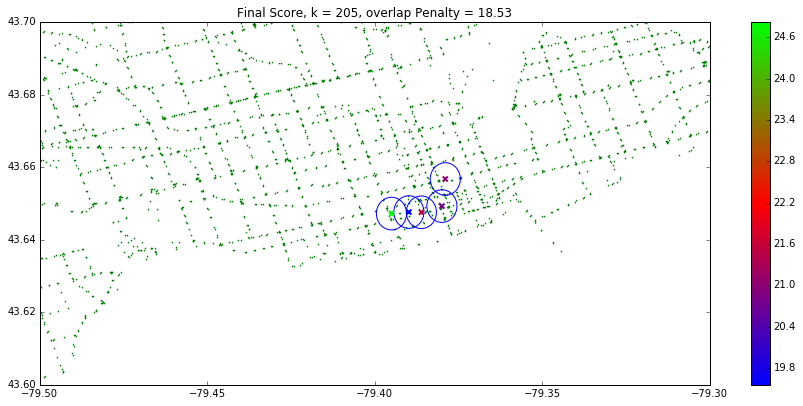

In [39]:
cm = plt.cm.get_cmap('brg')
args_index = args[:5]

k_bins = list(range(5, 400, 5))
#calculating 500m in coordinates, assuming spherical earth, radius 6371 km
xlims = (-79.5, -79.3)
ylims = (43.6, 43.7)
limratio = (ylims[1] - ylims[0])/(xlims[1] - xlims[0])

#PLOTTING =======================================

fig, ax = plt.subplots(figsize=(width + 2, (limratio)*width))
#fig, ax = plt.subplots(figsize=(12, 6))

#Transit stops are denoted by triangles
plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=0.5)
#plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, facecolors='none', s=5)
#plt.plot(culture['LONGITUDE'], culture[ 'LATITUDE'], 'o', mfc='none', ms=2)

sc = plt.scatter(centroids[:, 0][args_index], centroids[:, 1][args_index],
            marker='x', s=25, linewidths=2,
            c=scores[args_index], zorder=10, cmap=cm)

circle_rad = d/6371 * (360 / (2 * np.pi))
for i in range(len(args_index)):
    circle = plt.Circle(centroids[args_index[i]], circle_rad, color='blue')
    circle.set_facecolor('none')
    ax.add_artist(circle)
    
    
plt.colorbar(sc)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])
plt.title('Final Score, k = '+str(k_bins[index]) + ', overlap Penalty = '+str(k_scores[index])[:5])

#mplleaflet.display()

In [37]:
cm = plt.cm.get_cmap('brg')
args_index = args[:5]

k_bins = list(range(5, 400, 5))
#calculating 500m in coordinates, assuming spherical earth, radius 6371 km
xlims = (-79.5, -79.3)
ylims = (43.6, 43.7)
limratio = (ylims[1] - ylims[0])/(xlims[1] - xlims[0])

#PLOTTING =======================================

fig, ax = plt.subplots(figsize=(width + 2, (limratio)*width))
#fig, ax = plt.subplots(figsize=(12, 6))

#Transit stops are denoted by triangles
#plt.scatter(stops['stop_lon'], stops['stop_lat'], marker='^', color='g', s=0.5)
#plt.scatter(culture['LONGITUDE'], culture[ 'LATITUDE'], c=cluster, facecolors='none', s=5)
#plt.plot(culture['LONGITUDE'], culture[ 'LATITUDE'], 'o', mfc='none', ms=2)

sc = plt.scatter(centroids[:, 0][args_index], centroids[:, 1][args_index],
            marker='x', s=100, linewidths=3,
            c=scores[args_index], zorder=10, cmap=cm)

circle_rad = d/6371 * (360 / (2 * np.pi))
"""for i in range(len(args_index)):
    circle = plt.Circle(centroids[args_index[i]], circle_rad, color='blue')
    circle.set_facecolor('none')
    ax.add_artist(circle)"""
    
    
plt.colorbar(sc)
plt.xlim(xlims[0], xlims[1])
plt.ylim(ylims[0], ylims[1])
plt.title('Final Score, k = '+str(k_bins[index]) + ', overlap Penalty = '+str(k_scores[index])[:5])

mplleaflet.show()
#mplleaflet.show()